In [ ]:
 # Install beberapa library yang dibutuhkan
!pip install sklearn-genetic
!pip install -U pymoo
!pip install --pre -U pymoo
!pip install tpot
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 KB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210096 sha256=81d09b33904919450b708ed8f3e348cb15aa0339933500032cd1ce8525d36b55
  Stored in directory: /root/.cache/pip/wheels/2d/08/6b/126ea9009f7482fd53a78d0db2ece5aca70af8f4a30445386b
Successfully bu

In [ ]:
# Basic Library
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import skew

# Data Preparetion
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model Building
import plotly.express as px
from sklearn.model_selection import RepeatedKFold # for cv in TPOT
from tpot import TPOTRegressor # TPOT Regression
from sklearn.ensemble import ExtraTreesRegressor # Model Machine Learning
import pyswarms as ps #PSO
from pyswarms.utils.search import RandomSearch #Untuk mencari parameter PSO
from pyswarms.utils.functions import single_obj as fx #PSO
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface) #PSO
from pymoo.factory import get_problem # Get Problem GA
from pymoo.algorithms.soo.nonconvex.ga import GA # GA
from pymoo.problems import get_problem # Get Problem GA
from pymoo.optimize import minimize # Untuk mencari nilai Fitness

# Model Evaluation
from sklearn.metrics import  r2_score,mean_absolute_percentage_error, mean_squared_error,mean_absolute_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

2023-02-17 01:42:14,417 - root - INFO - Generating grammar tables from /usr/lib/python3.8/lib2to3/Grammar.txt
2023-02-17 01:42:14,442 - root - INFO - Generating grammar tables from /usr/lib/python3.8/lib2to3/PatternGrammar.txt


# **1. Pengumpulan Data**

In [ ]:
# Reading Dataset
df = pd.read_excel('/content/drive/MyDrive/PROJECT-III/Bahan/employee_attrition.xlsx')
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,2,...,4,80,2,10,3,2,10,9,6,8
1466,41.0,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,2,...,1,80,0,11,3,1,3,2,1,2
1467,22.0,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,3,...,2,80,1,1,5,3,0,0,0,0
1468,29.0,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,4,...,1,80,1,10,2,3,4,3,0,3


In [ ]:
# Informasi Statistik Dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1279.000000,1429.000000,1321.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,37.951525,800.657803,9.792581,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.226035,404.296047,8.335083,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,464.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,798.000000,8.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1157.000000,15.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Informasi karakteristik Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1279 non-null   float64
 1   BusinessTravel            1460 non-null   object 
 2   DailyRate                 1429 non-null   float64
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1321 non-null   float64
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

# **2. Pra-Pemrosesan Data**

## **2.1. Encoding Data**

In [ ]:
# Encoding data untuk mengubah data category object menjadi category numerik
# Converting type of columns to 'category'
df['BusinessTravel'] = df['BusinessTravel'].astype('category')
df['Department'] = df['Department'].astype('category')
df['EducationField'] = df['EducationField'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['JobRole'] = df['JobRole'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Over18'] = df['Over18'].astype('category')
df['OverTime'] = df['OverTime'].astype('category')

# Assigning numerical values and storing in another column
df['BusinessTravel'] = df['BusinessTravel'].cat.codes
df['Department'] = df['Department'].cat.codes
df['EducationField'] = df['EducationField'].cat.codes
df['Gender'] = df['Gender'].cat.codes
df['JobRole'] = df['JobRole'].cat.codes
df['MaritalStatus'] = df['MaritalStatus'].cat.codes
df['Over18'] = df['Over18'].cat.codes
df['OverTime'] = df['OverTime'].cat.codes

df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,2,866.0,2,NaN,3,3,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,2,1084.0,1,13.0,2,3,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,2,240.0,0,22.0,1,0,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,2,1339.0,1,7.0,3,1,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,2,1396.0,1,NaN,2,1,1,304,4,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,2,750.0,1,28.0,3,1,1,1596,2,...,4,80,2,10,3,2,10,9,6,8
1466,41.0,2,447.0,1,NaN,3,1,1,1814,2,...,1,80,0,11,3,1,3,2,1,2
1467,22.0,1,1256.0,1,NaN,4,1,1,1203,3,...,2,80,1,1,5,3,0,0,0,0
1468,29.0,2,1378.0,1,13.0,2,4,1,2053,4,...,1,80,1,10,2,3,4,3,0,3


## **2.2. Handling Missing Value**

In [ ]:
# Cek data kosong
def features_with_missing_values(df):
    null = df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100
    print('Persentasi data yang kosong ' ,round(null,2) ,'%')
    print('Perkiraan missing value :')
    for i in df.columns:
        if df[i].isna().sum()>0:
            print('Atribut',i,'has '+ str(df[i].isna().sum()) + ' missing values')

features_with_missing_values(df)

Persentasi data yang kosong  0.76 %
Perkiraan missing value :
Atribut Age has 191 missing values
Atribut DailyRate has 41 missing values
Atribut DistanceFromHome has 149 missing values


In [ ]:
# Input Missing Value dengan Mean
Age = df['Age']
DailyRate = df['DailyRate']
DistanceFromHome = df['DistanceFromHome']

df.Age = df.Age.fillna(value=df.Age.mean())
df.DailyRate = df.DailyRate.fillna(value=df.DailyRate.mean())
df.DistanceFromHome = df.DistanceFromHome.fillna(value=df.DistanceFromHome.mean())

df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37.951525,2,866.0,2,9.792581,3,3,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.000000,2,1084.0,1,13.000000,2,3,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.000000,2,240.0,0,22.000000,1,0,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.000000,2,1339.0,1,7.000000,3,1,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.000000,2,1396.0,1,9.792581,2,1,1,304,4,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.951525,2,750.0,1,28.000000,3,1,1,1596,2,...,4,80,2,10,3,2,10,9,6,8
1466,41.000000,2,447.0,1,9.792581,3,1,1,1814,2,...,1,80,0,11,3,1,3,2,1,2
1467,22.000000,1,1256.0,1,9.792581,4,1,1,1203,3,...,2,80,1,1,5,3,0,0,0,0
1468,29.000000,2,1378.0,1,13.000000,2,4,1,2053,4,...,1,80,1,10,2,3,4,3,0,3


## **2.3. Handling Data Duplicated**

In [ ]:
# Cek data duplikat
duplikat = df.duplicated().sum()
print('Terdapat data duplikat sebanyak', duplikat)

Terdapat data duplikat sebanyak 0


## **2.4. Handling Data Outlier**

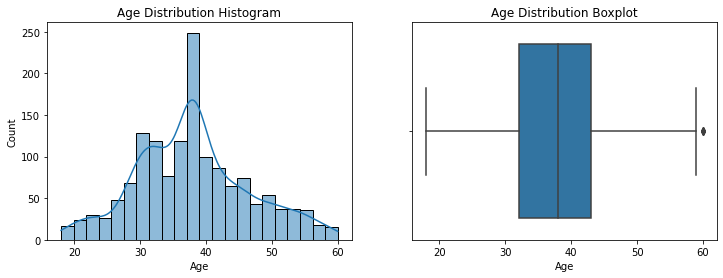

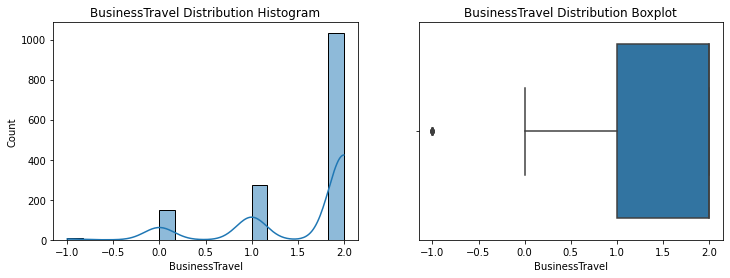

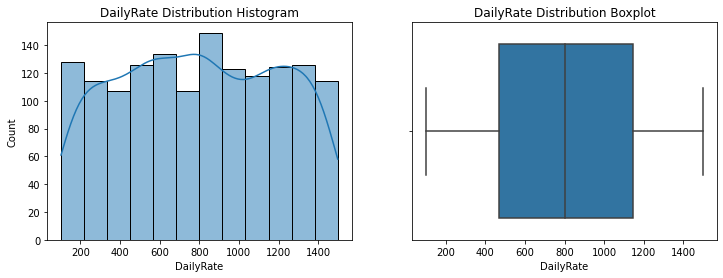

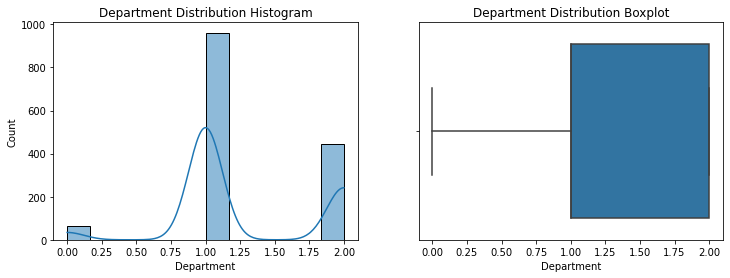

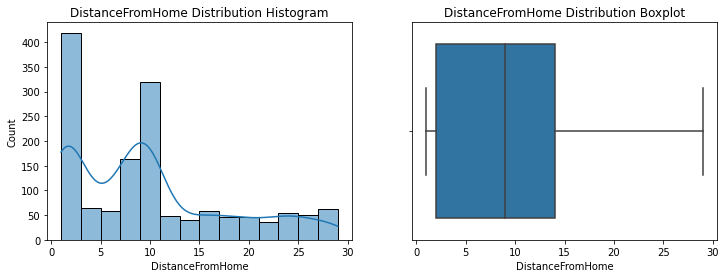

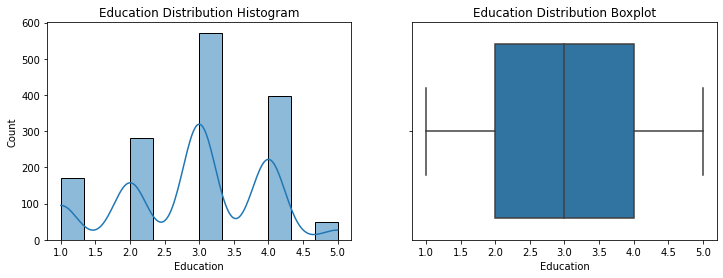

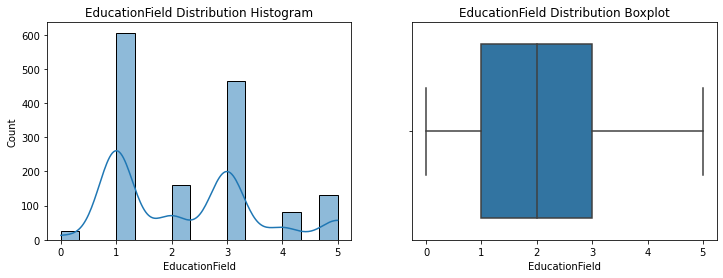

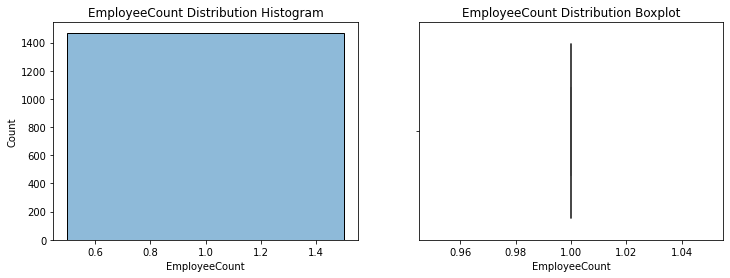

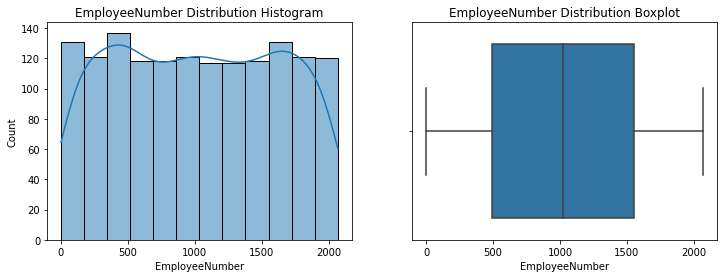

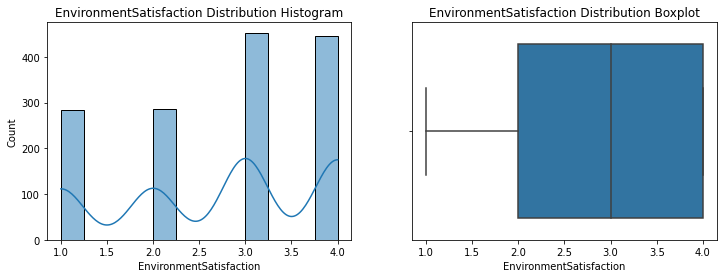

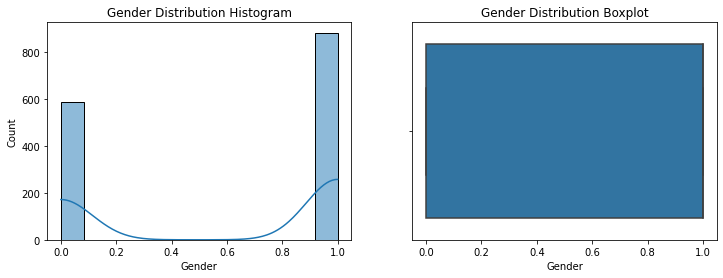

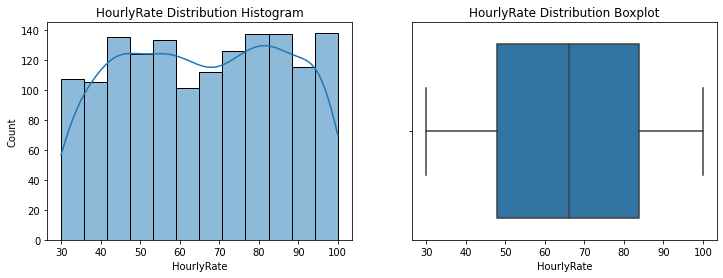

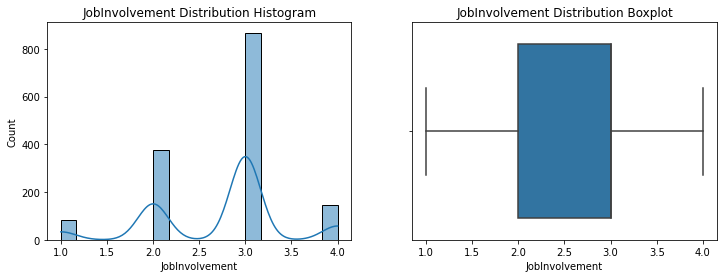

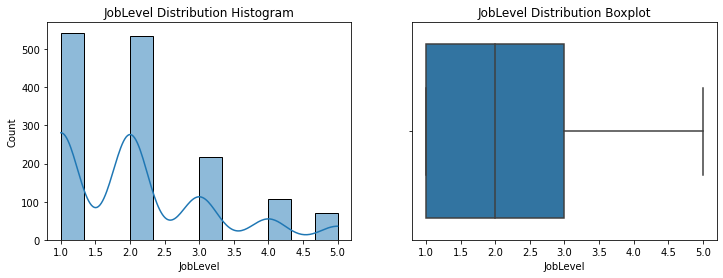

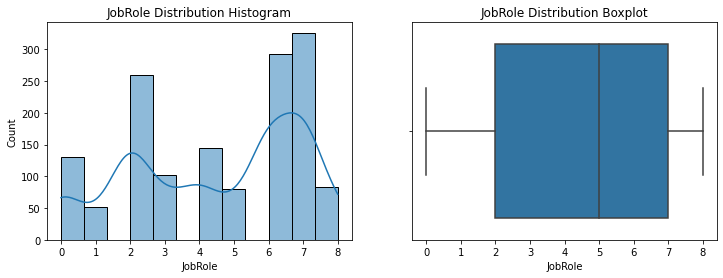

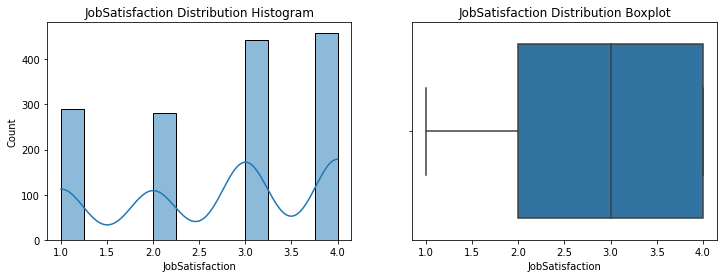

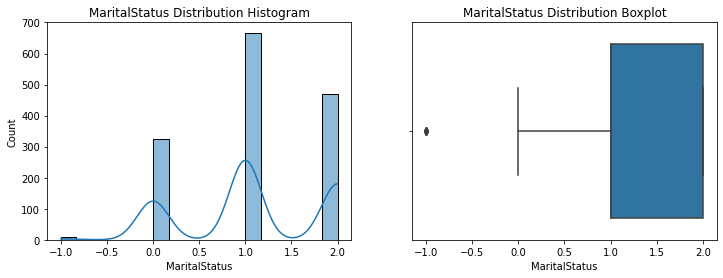

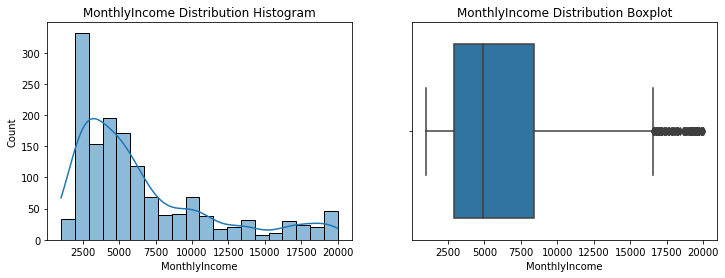

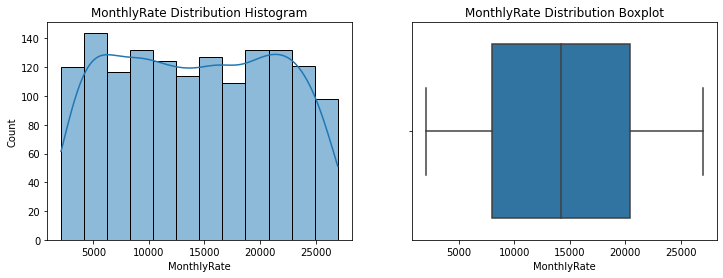

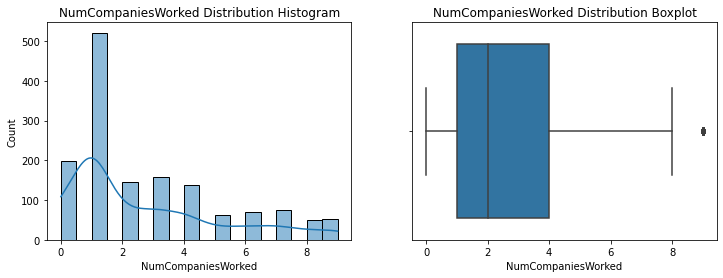

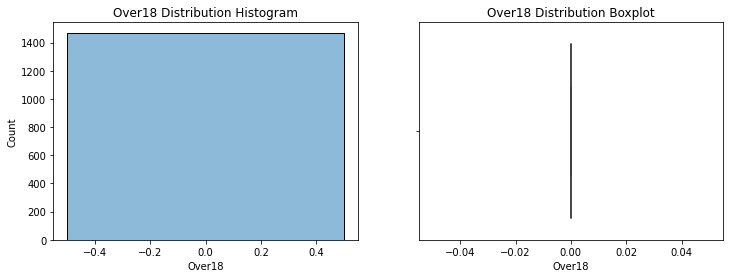

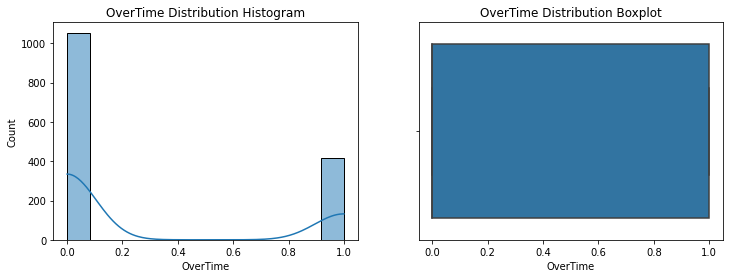

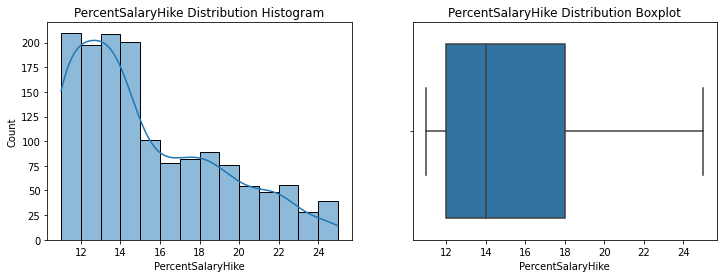

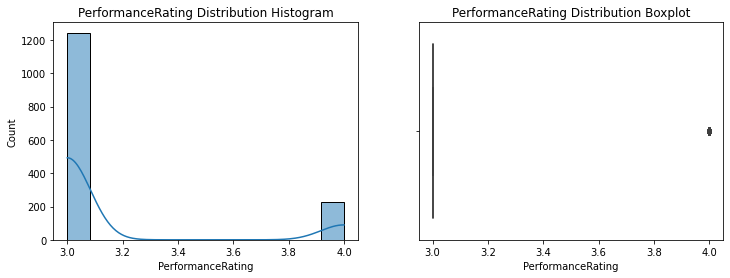

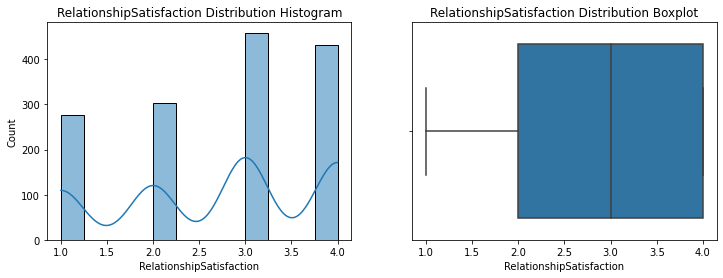

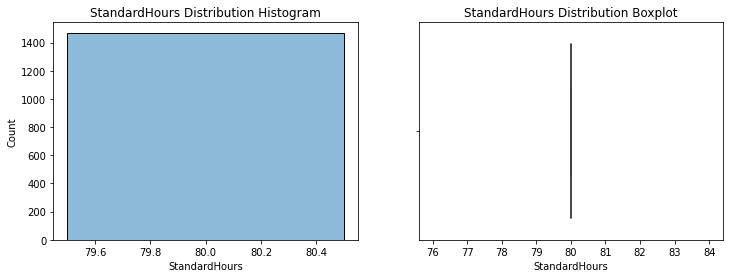

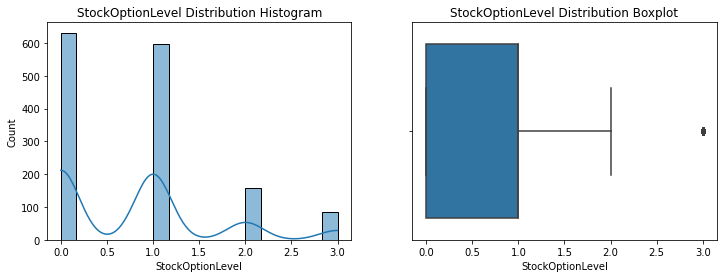

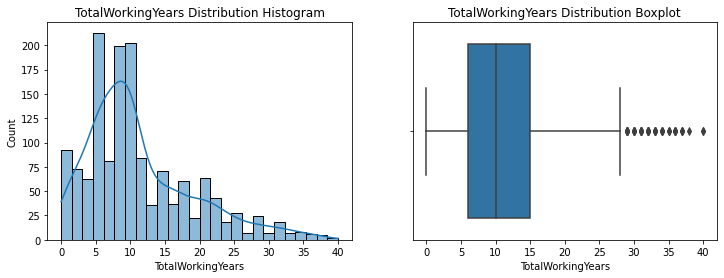

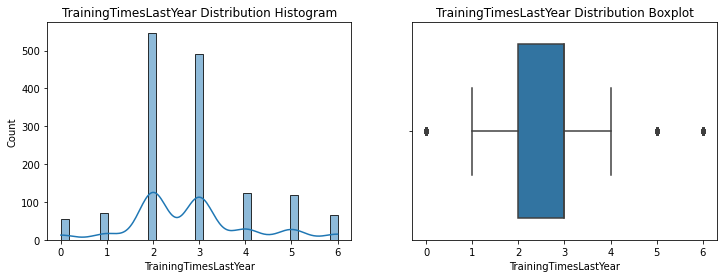

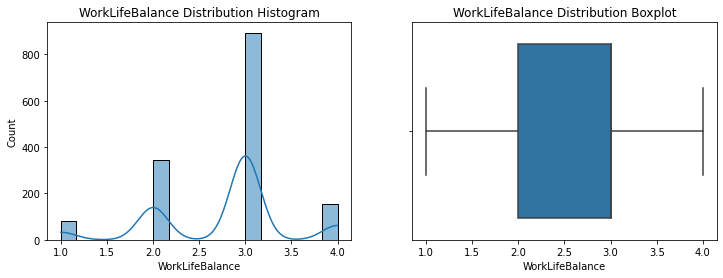

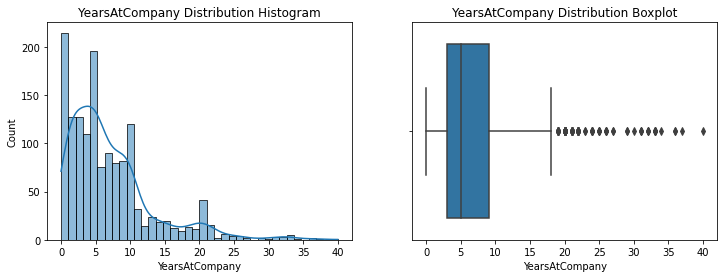

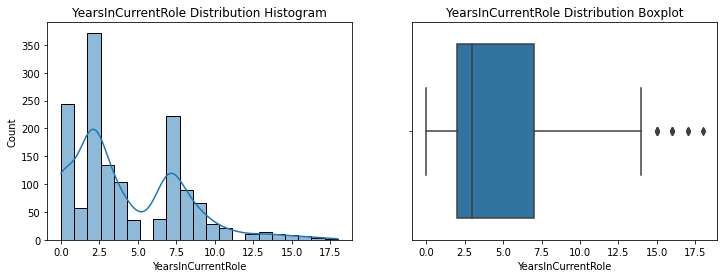

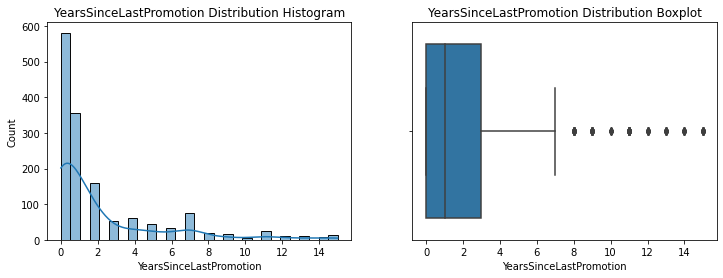

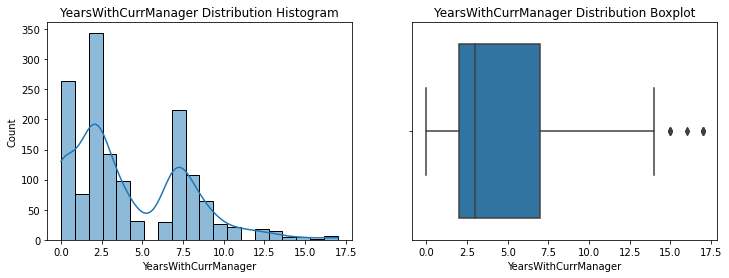

In [ ]:
# Fungsi untuk menampilkan boxplot dan histogram
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f"{var} Distribution Histogram")
    ax[1].set_title(f"{var} Distribution Boxplot")

    plt.show()

df_var = df.columns
for var in df_var:
    num_dist(df, var)

In [ ]:
# Terlihat pada terdapat beberapa variabel yang terdapat outlier
outlier_var = ['Age', 'BusinessTravel', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
               'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
num_var = ['Age', 'MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany']
threshold = 0.1

# Menggunakan treatment Winsorize untuk menghapus Outlier
df[outlier_var] = df[outlier_var].apply(lambda x: x.clip(x.quantile(threshold), x.quantile(1-threshold)))
df[num_var] = np.log(df[num_var])

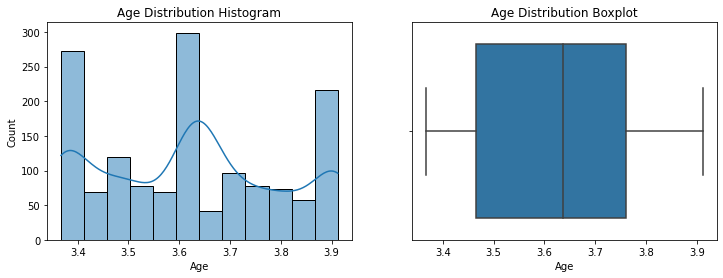

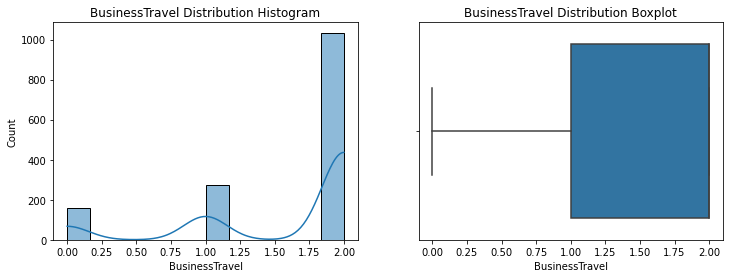

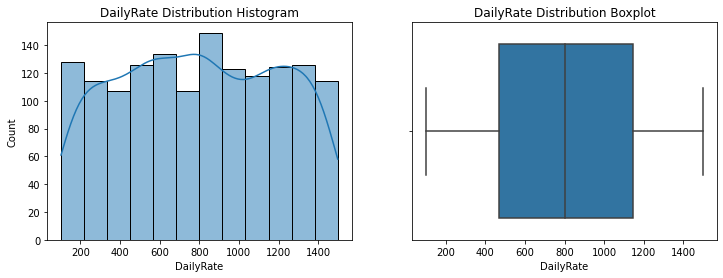

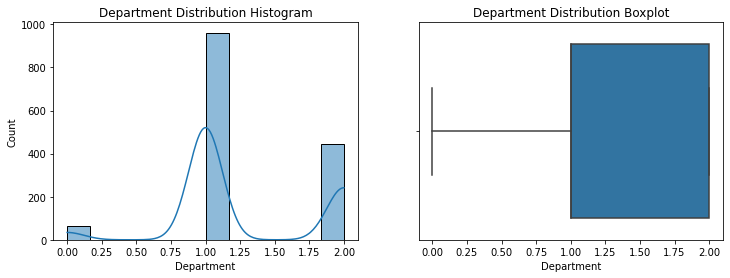

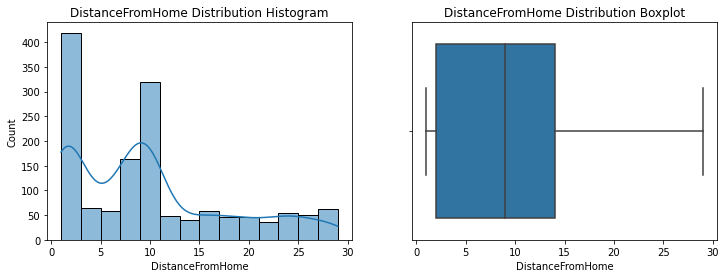

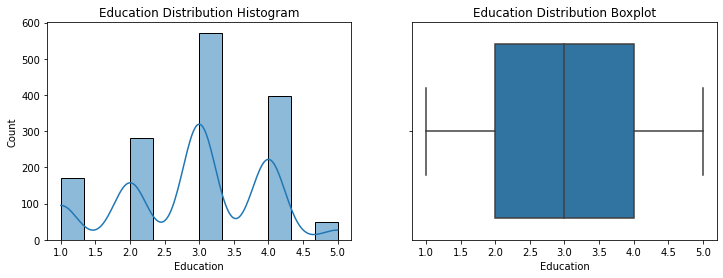

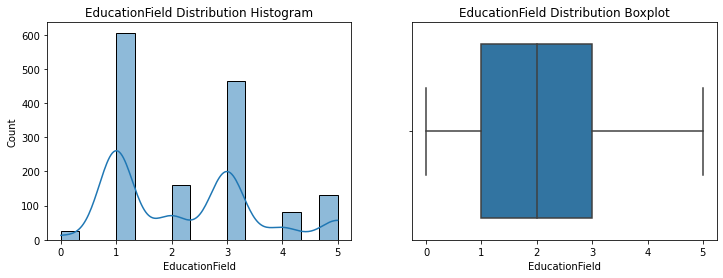

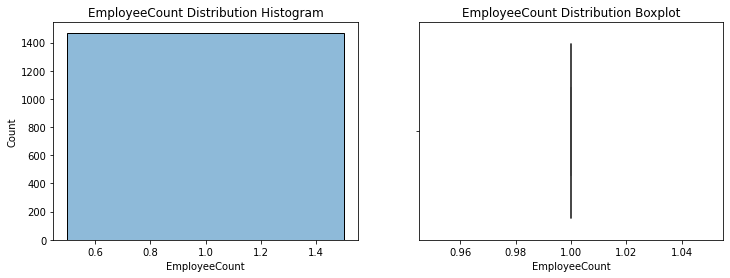

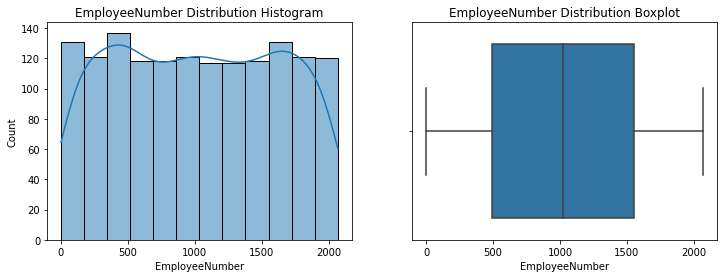

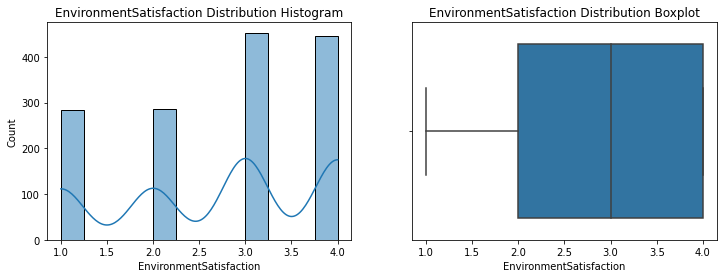

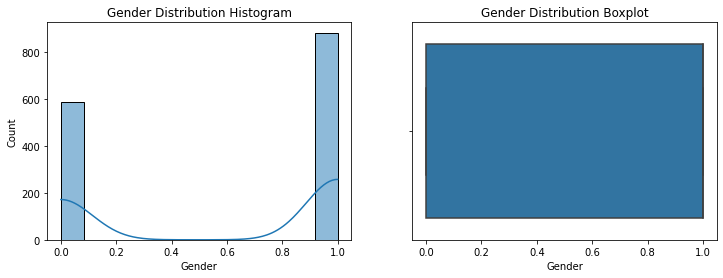

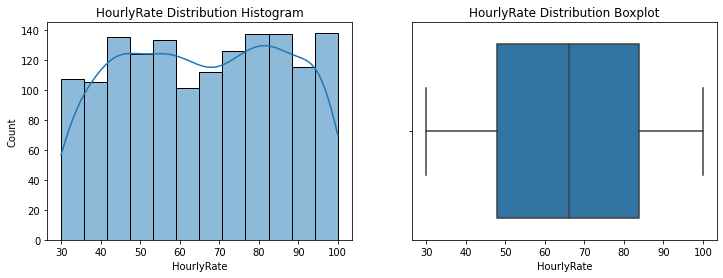

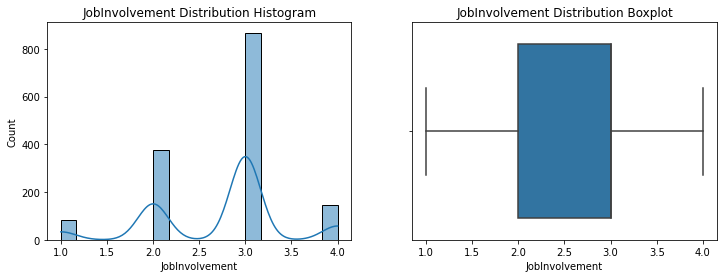

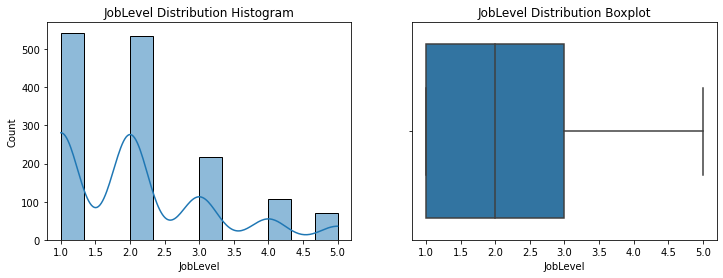

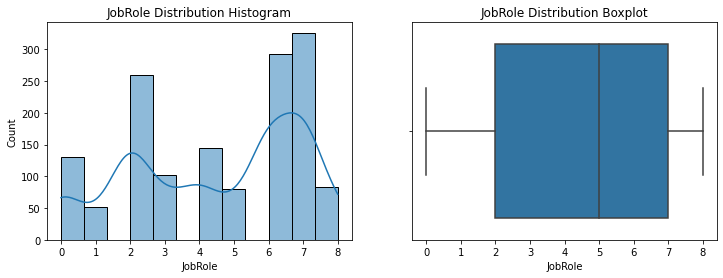

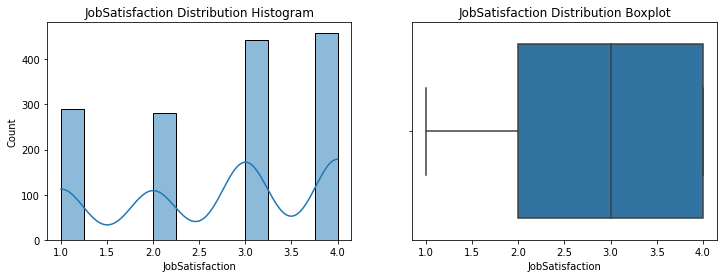

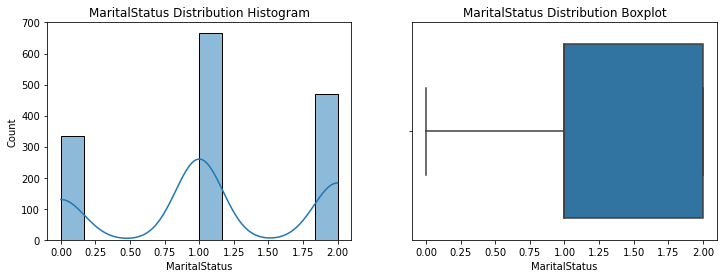

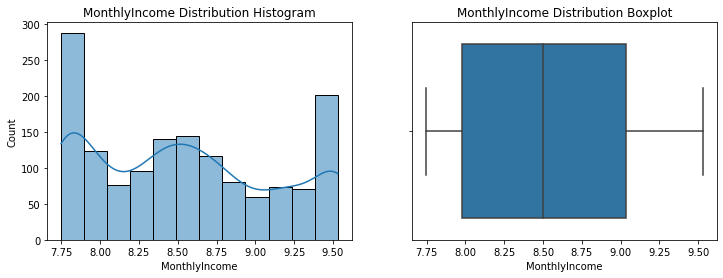

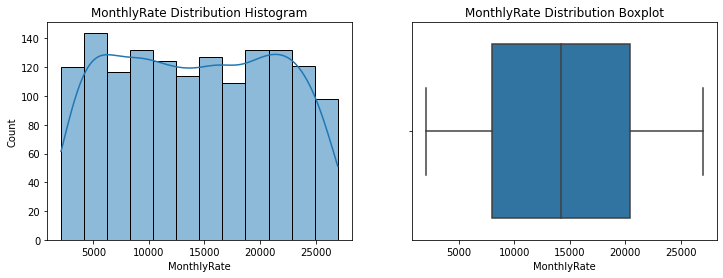

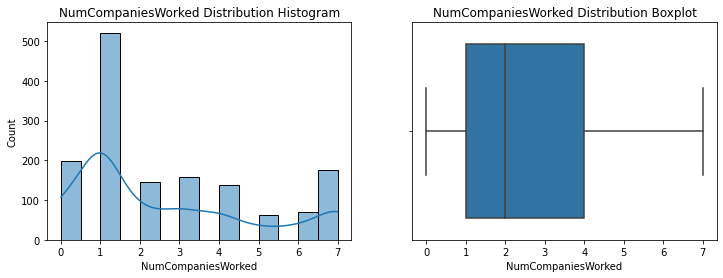

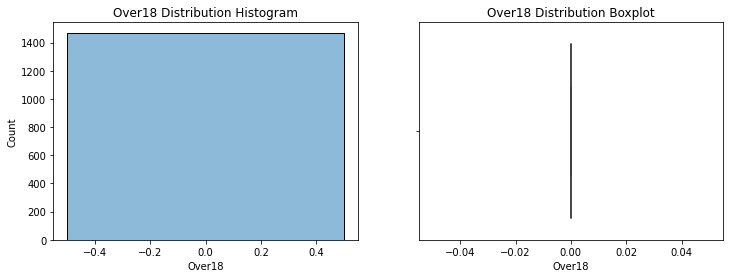

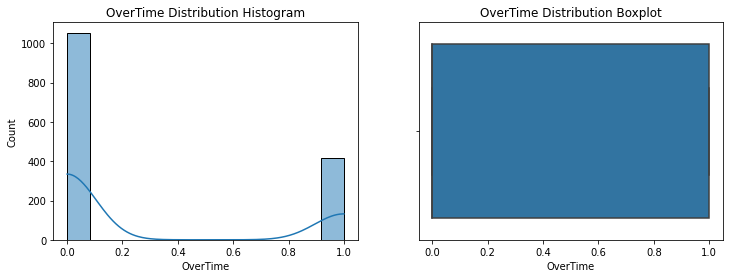

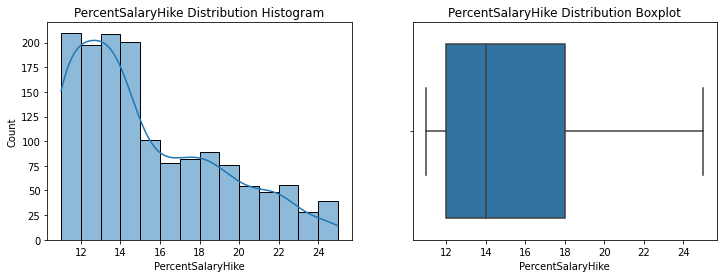

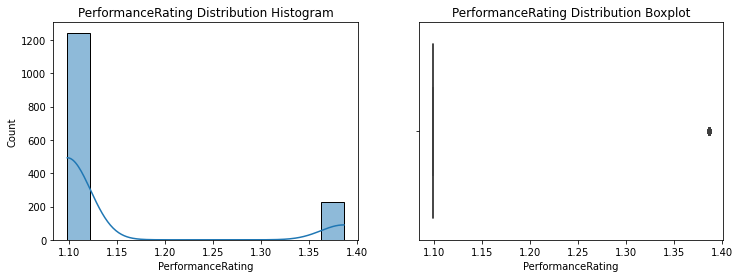

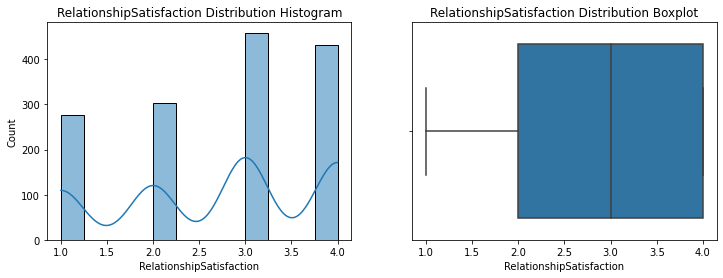

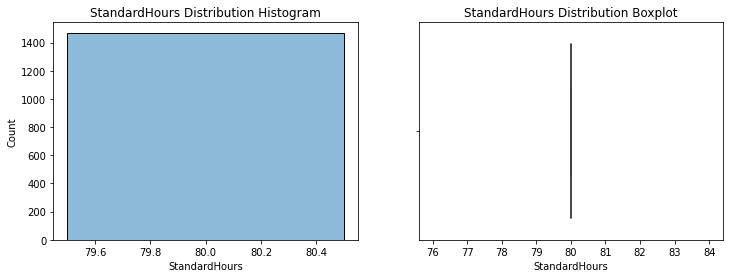

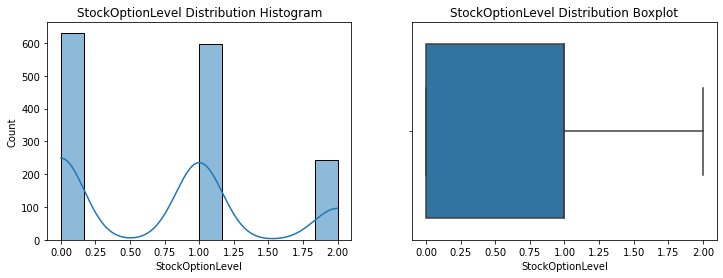

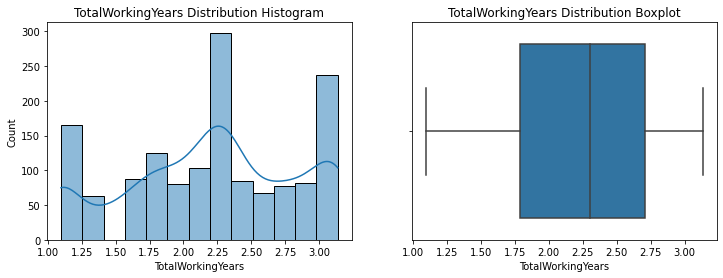

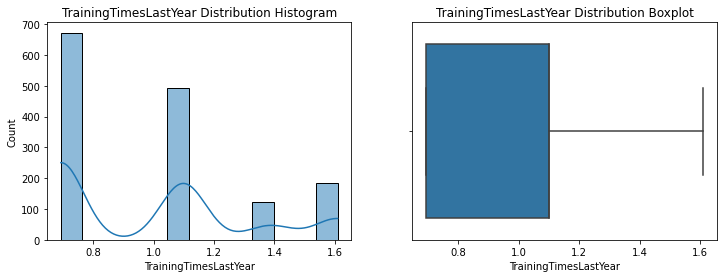

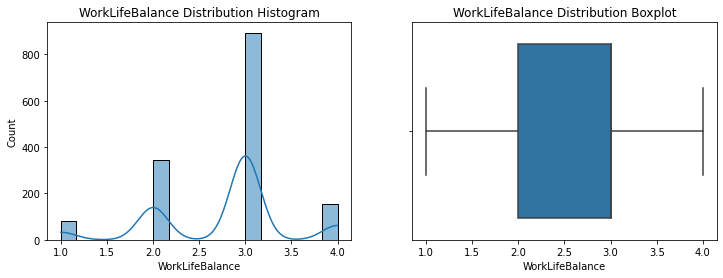

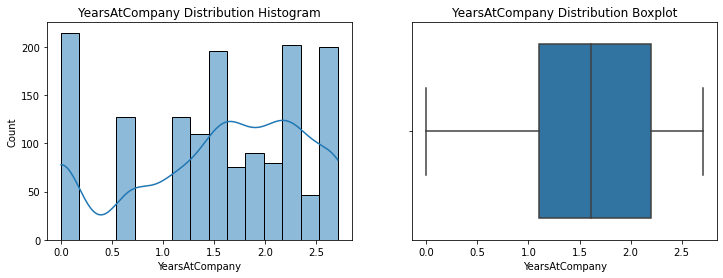

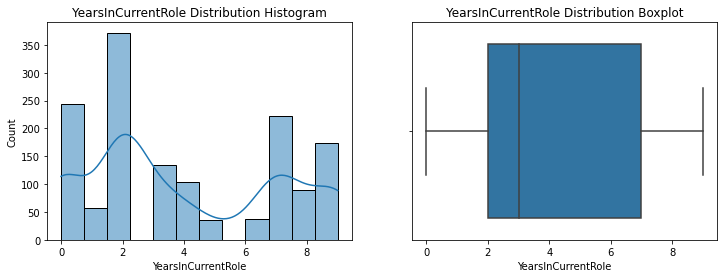

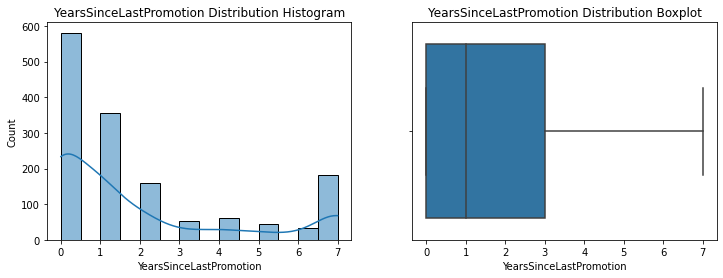

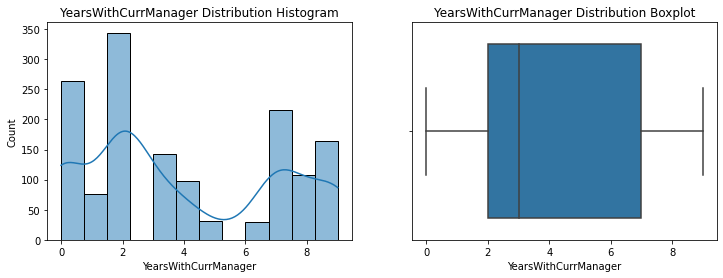

In [ ]:
# Cek data outlier
df_var = df.columns

for var in df_var:
    num_dist(df, var)

In [ ]:
# Pemilihan variabel independen dan dependen
X = df.drop(columns=['MonthlyIncome'], axis=1)
y = df[['MonthlyIncome']]

## **2.4. Normalisasi Data menggunakan StandarScaler**

In [ ]:
# Normalisasi Data menggunakan StandarScaler
object = StandardScaler()

X_scale = object.fit_transform(X)
Y_scale = object.fit_transform(y)
print(X_scale)

[[ 0.07498206  0.59860843  0.16397922 ...  0.00529123 -0.36970615
  -0.29333211]
 [ 1.62101063  0.59860843  0.71106013 ... -0.64288451 -0.36970615
  -0.29333211]
 [-1.43348     0.59860843 -1.40699625 ... -1.29106026 -0.78679598
  -1.25511247]
 ...
 [-1.43348    -0.87782512  1.14270195 ... -1.29106026 -0.78679598
  -1.25511247]
 [-1.43348     0.59860843  1.44886649 ... -0.31879664 -0.78679598
  -0.29333211]
 [ 1.62101063  0.59860843 -1.34676716 ... -1.29106026 -0.78679598
  -1.25511247]]


In [ ]:
columns = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome','Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
           'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement','JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
           'MonthlyRate', 'NumCompaniesWorked', 'Over18','OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction',
           'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany',
           'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
len(columns)

33

In [ ]:
df_scale = pd.DataFrame(X_scale)
df_scale.columns = columns
df_scale['MonthlyIncome'] = Y_scale
df_scale

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,0.074982,0.598608,0.163979,1.401512,0.000000,0.085049,0.565311,0.0,0.737987,1.169781,...,0.0,-1.015958,-0.665311,1.186712,0.338096,0.068922,0.005291,-0.369706,-0.293332,0.840868
1,1.621011,0.598608,0.711060,-0.493817,0.406085,-0.891688,0.565311,0.0,-1.287538,1.169781,...,0.0,1.744592,-0.957605,0.300030,0.338096,-0.191896,-0.642885,-0.369706,-0.293332,-0.243372
2,-1.433480,0.598608,-1.406996,-2.389147,1.545559,-1.868426,-1.688776,0.0,1.145085,1.169781,...,0.0,0.364317,-1.776551,-0.949678,0.338096,-1.812247,-1.291060,-0.786796,-1.255112,-1.343759
3,1.030214,0.598608,1.350994,-0.493817,-0.353564,0.085049,-0.937414,0.0,-1.560045,-0.660531,...,0.0,0.364317,1.488939,-0.949678,0.338096,-1.812247,-1.291060,-0.786796,-1.255112,1.075146
4,-0.221036,0.598608,1.494038,-0.493817,0.000000,-0.891688,-0.937414,0.0,-1.197810,1.169781,...,0.0,-1.015958,0.907136,0.300030,1.754054,1.185758,1.625731,0.464473,0.989042,0.236370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.074982,0.598608,-0.127128,-0.493817,2.305208,0.085049,-0.937414,0.0,0.949013,-0.660531,...,0.0,1.744592,0.153635,0.300030,-1.077862,0.879097,1.625731,1.715743,1.309635,-0.693855
1466,0.508221,0.598608,-0.887520,-0.493817,0.000000,0.085049,-0.937414,0.0,1.311248,-0.660531,...,0.0,-1.015958,0.306434,0.300030,-2.493820,-0.528149,-0.642885,-0.369706,-0.613926,0.489115
1467,-1.433480,-0.877825,1.142702,-0.493817,0.000000,1.061787,-0.937414,0.0,0.295994,0.254625,...,0.0,0.364317,-1.776551,1.874476,0.338096,-1.812247,-1.291060,-0.786796,-1.255112,-0.993188
1468,-1.433480,0.598608,1.448866,-0.493817,0.406085,-0.891688,1.316673,0.0,1.708377,1.169781,...,0.0,0.364317,0.153635,-0.949678,0.338096,-0.191896,-0.318797,-0.786796,-0.293332,-0.412687


In [ ]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   BusinessTravel            1470 non-null   float64
 2   DailyRate                 1470 non-null   float64
 3   Department                1470 non-null   float64
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   float64
 6   EducationField            1470 non-null   float64
 7   EmployeeCount             1470 non-null   float64
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   float64
 10  Gender                    1470 non-null   float64
 11  HourlyRate                1470 non-null   float64
 12  JobInvolvement            1470 non-null   float64
 13  JobLevel                  1470 non-null   float64
 14  JobRole 

# **3. Pemodelan**

## **3.1. Optimalisasi Variabel menggunakan PSO**

In [ ]:
X_raw = df_scale
n_dim = len(X_raw)
n_dim_1 = len(columns)

In [ ]:
# Set-up choices for the parameters
options = {
    'c1': (0,1),
    'c2': (0,1),
    'w': (0,1),
    'k': (11, 15),
    'p': 1
}

# Create a RandomSearch object
# n_selection_iters is the number of iterations to run the searcher
# iters is the number of iterations to run the optimizer
g = RandomSearch(ps.single.LocalBestPSO, n_particles=20,
            dimensions=n_dim, options=options, objective_func=fx.sphere,
            iters=10, n_selection_iters=100)

best_score, best_options = g.search()

2023-02-17 01:42:52,682 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 0.5997172218136371, 'c2': 0.06671880410438458, 'w': 0.8971643536257452, 'k': 14, 'p': 1}
pyswarms.single.local_best: 100%|██████████|10/10, best_cost=469
2023-02-17 01:42:52,792 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 469.395025976364, best pos: [0.46331681 0.38996168 0.71457479 ... 0.48322782 0.78833897 0.84598216]
2023-02-17 01:42:52,815 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 0.6294983299205407, 'c2': 0.5687646606675034, 'w': 0.013027182258291137, 'k': 13, 'p': 1}
pyswarms.single.local_best: 100%|██████████|10/10, best_cost=474
2023-02-17 01:42:52,991 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 473.6699303461867, best pos: [0.46595058 0.35734122 0.14911362 ... 0.41465869 0.5631886  0.26905742]
2023-02-17 01:42:53,013 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 0.243427

In [ ]:
c1 = best_options['c1']
c2 = best_options['c2']
w = best_options['w']

# Untuk melihat best parameter
print(best_options['c1'])
print(best_options['c2'])
print(best_options['w'])

0.4691620892830245
0.06770573332239416
0.14850152526643035


2023-02-17 01:43:03,280 - pyswarms.single.global_best - INFO - Optimize for 3500 iters with {'c1': 0.4691620892830245, 'c2': 0.06770573332239416, 'w': 0.14850152526643035}
pyswarms.single.global_best: 100%|██████████|3500/3500, best_cost=391
2023-02-17 01:43:15,768 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 390.78908931854926, best pos: [0.60465451 0.53481928 0.51689869 ... 0.46436735 0.25093303 0.5796148 ]


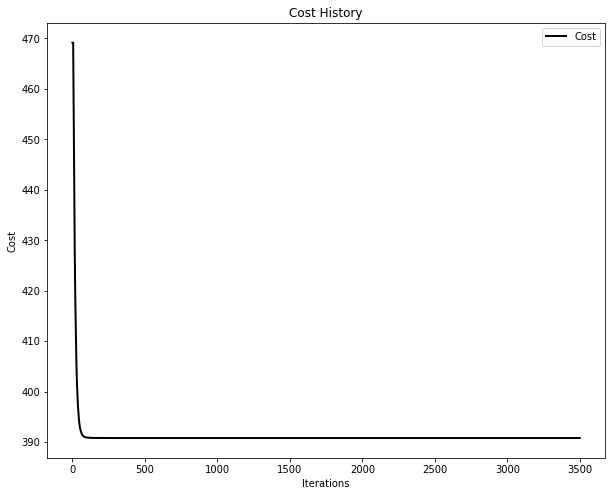

In [ ]:
options = {'c1': c1, 'c2': c2, 'w':w} # Konstanta dari rumus untuk mencari kecepatan partikel
# c1 adalah aspek cognitif setiap pembaruan kecepatan (individu)
# c2 adalah aspek sosial setiap pembaruan kecepatan (kelompok)
# w adalah momen inersia yang akan digunakan setiap iterasi untuk pembaruan kecepatan

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=n_dim, options=options) # Model Optimalisasi Variabel dengan Parameter yang ditentukan
cost, pos = optimizer.optimize(fx.sphere, iters=3500) # Untuk mencari best pBest dan gBest

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [ ]:
# Memakai hasil PSO
X = X_raw[pos>0]
X_pso = X.drop(columns=['MonthlyIncome'], axis=1)

y = X_raw[pos>0]
y_pso = y[['MonthlyIncome']]

## **3.3. TPOT Regression**

In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_pso, y_pso, test_size=0.2, random_state=42)

# Define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Define search
model = TPOTRegressor(generations=5, population_size=50, scoring='r2', cv=cv, verbosity=2, random_state=42, n_jobs=1)
# Perform the search
model.fit(X_train, y_train)
# Export the best model
model.export('tpot_insurance_best_model.py')

In [ ]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,-0.541544,-0.877825,5.077869e-01,-0.493817,-0.986605,-0.891688,-0.937414,0.0,0.191311,1.169781,...,1.191438,0.0,-1.015958,-0.957605,0.300030,-1.077862,-0.528149,-0.642885,-0.786796,-0.613926
727,-0.221036,0.598608,-6.792281e-01,1.401512,-0.986605,1.061787,-0.937414,0.0,1.138439,0.254625,...,0.266233,0.0,-1.015958,1.004328,-0.949678,-1.077862,1.185758,0.977555,1.715743,0.989042
254,0.369761,0.598608,-1.083265e+00,-0.493817,-0.226955,-0.891688,-0.937414,0.0,1.161702,-0.660531,...,-0.658973,0.0,0.364317,1.095963,0.300030,0.338096,-1.812247,-1.291060,-0.786796,-1.255112
1175,-1.433480,-0.877825,-9.803735e-01,-0.493817,-0.986605,-1.868426,-0.937414,0.0,0.811098,1.169781,...,0.266233,0.0,1.744592,-1.315345,0.300030,0.338096,-0.528149,-0.642885,-0.786796,-0.613926
1341,0.082140,0.598608,-1.018017e+00,1.401512,-0.100347,0.085049,-0.186052,0.0,-0.219111,-0.660531,...,1.191438,0.0,0.364317,-1.776551,0.300030,0.338096,-1.002071,-0.642885,-0.369706,-0.613926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-1.433480,0.598608,1.446357e+00,1.401512,-0.986605,0.085049,-0.937414,0.0,-0.976813,1.169781,...,-1.584178,0.0,-1.015958,-0.957605,0.300030,0.338096,0.068922,0.005291,-0.786796,0.027261
1294,0.074982,0.598608,-1.459697e+00,-0.493817,0.785910,-0.891688,1.316673,0.0,1.430885,1.169781,...,1.191438,0.0,-1.015958,-1.315345,-0.949678,0.338096,-0.528149,-0.642885,-0.786796,-0.613926
860,0.074982,0.598608,2.853023e-16,1.401512,1.039126,-1.868426,-0.937414,0.0,0.621673,-1.575686,...,-0.658973,0.0,-1.015958,-0.665311,0.300030,-1.077862,-0.528149,-0.642885,-0.369706,-0.613926
1459,0.775290,-0.877825,-6.064512e-01,-0.493817,0.026261,1.061787,-0.937414,0.0,-0.958535,0.254625,...,-0.658973,0.0,0.364317,-0.015277,0.300030,1.754054,0.755948,0.977555,-0.786796,-1.255112


## **3.4. Modelling with ExtraTreesRegressor**

In [ ]:
# Modelling with ExtraTreesRegressor
reg = ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=5,
                          n_estimators=100).fit(X_train, y_train)
reg.score(X_test, y_test)

0.8572872079198025

In [ ]:
# Hasil prediksi
y_pred = reg.predict(X_test)

# **4. Evaluasi Model**

Nilai R-squared score adalah  0.8572872079198025
Nilai Mean Squared Error adalah  0.13007227735356436
Nilai Mean Absolute Error adalah  0.25824017206049965
Nilai Root Mean Squared Error adalah 0.36065534427423135
Nilai Mean Absolute Percentage Error adalah 1.0388794596894109


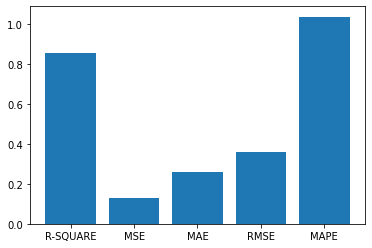

In [ ]:
# Evaluasi Model menggunakan R-Square, RMSE, dan MAPE
def metrics(y_test,y_pred):
    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test,y_pred))
    mape = mean_absolute_percentage_error(y_test,y_pred)
    print('Nilai R-squared score adalah ',r2)
    print('Nilai Mean Squared Error adalah ',mse)
    print('Nilai Mean Absolute Error adalah ',mae)
    print('Nilai Root Mean Squared Error adalah',rmse)
    print('Nilai Mean Absolute Percentage Error adalah',mape)
    xlabel = ['R-SQUARE', 'MSE', 'MAE', 'RMSE', 'MAPE']
    ylabel = [r2, mse, mae, rmse, mape]
    plt.bar(xlabel, ylabel)
    plt.show()

metrics(y_test,y_pred)

## **3.5. Optimalisasi Model menggunakan Genetic Algorithm**

In [ ]:
# Mencari problem
problem = get_problem("Ackley")
problem.n_var = n_dim_1

In [ ]:
reg.n_var = n_dim_1
n_par = len(y)
print(n_par)

1470


In [ ]:
reg.n_obj = n_par
reg.xl = np.array([0]*n_dim_1)
reg.xu = np.array([1]*n_dim_1)
reg.evaluate = problem.evaluate
reg.bounds = problem.bounds
reg.has_bounds = problem.has_bounds
reg.has_bounds = problem.has_bounds
reg.has_constraints = problem.has_constraints

In [ ]:
# Mencari Nilai fitness dengan problem yang dibuat
algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)

res = minimize(reg,
               algorithm,
               seed=1,
               save_history=True,
               verbose=True)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      100 |  3.8894813490 |  3.4795486332
     2 |      200 |  3.6399521908 |  3.0891818643
     3 |      300 |  3.3788717462 |  2.6136206058
     4 |      400 |  3.0567206948 |  2.2865180729
     5 |      500 |  2.7170605345 |  1.9580787113
     6 |      600 |  2.3696849867 |  1.6654840712
     7 |      700 |  2.0315780645 |  1.0581942228
     8 |      800 |  1.7022038853 |  0.8174416045
     9 |      900 |  1.3750333725 |  0.6682282578
    10 |     1000 |  1.0362555091 |  0.4193209175
    11 |     1100 |  0.7773981594 |  0.4024842817
    12 |     1200 |  0.5966552680 |  0.3431806006
    13 |     1300 |  0.4909012727 |  0.3045001453
    14 |     1400 |  0.4065354725 |  0.2558853932
    15 |     1500 |  0.3398355905 |  0.2107840417
    16 |     1600 |  0.2894617986 |  0.1848318236
    17 |     1700 |  0.2475943294 |  0.1818776966
    18 |     1800 |  0.2152067339 |  0.1521844426
    19 |     1900 |  0.1942688622 |  0.1401063577


In [ ]:
X, F = res.opt.get("X", "F")

hist = res.history
print(len(hist))

182


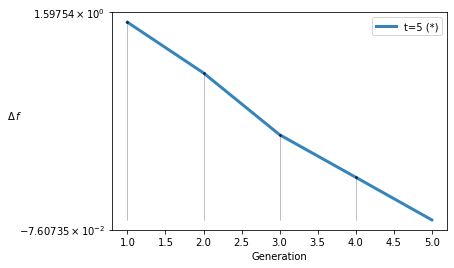

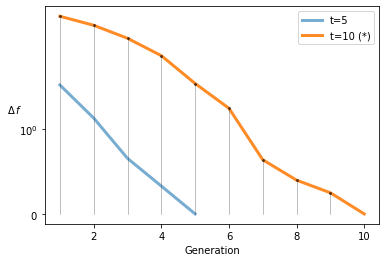

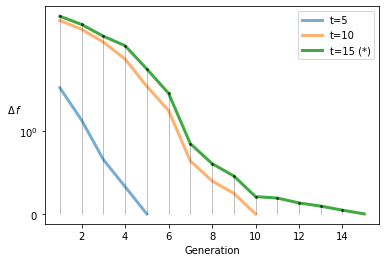

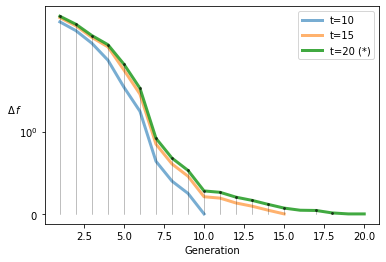

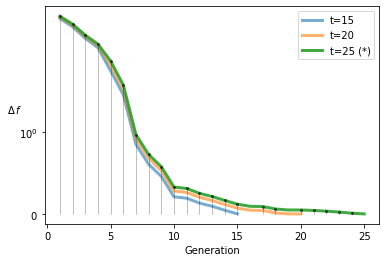

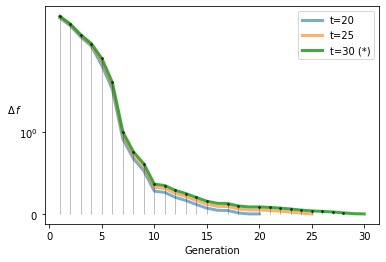

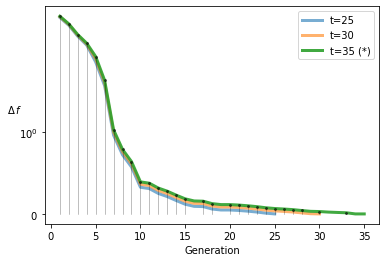

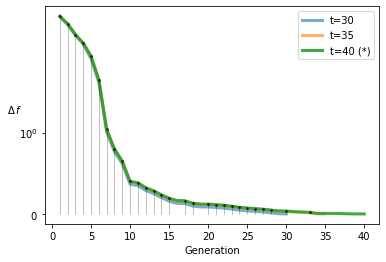

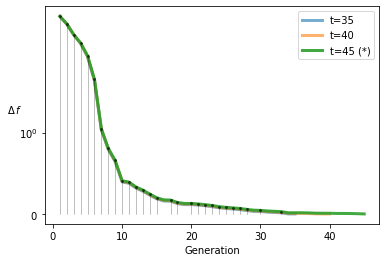

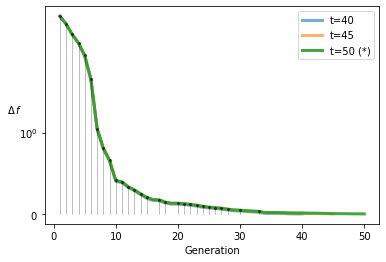

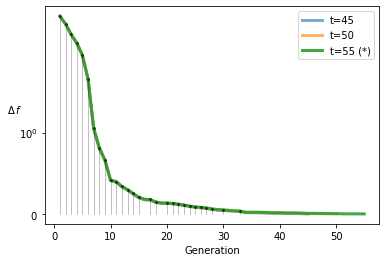

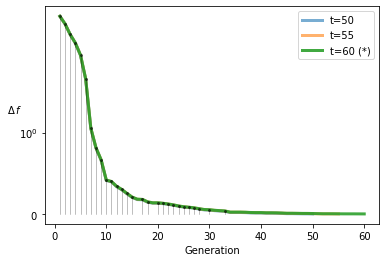

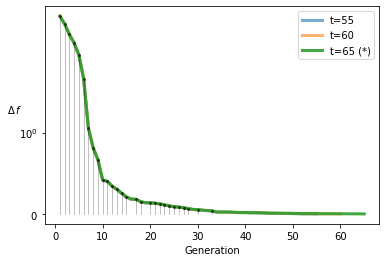

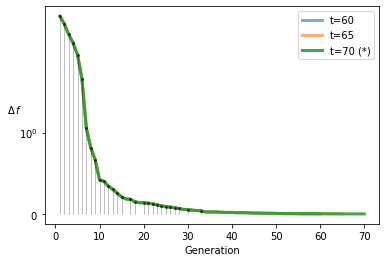

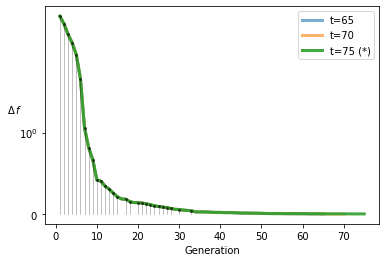

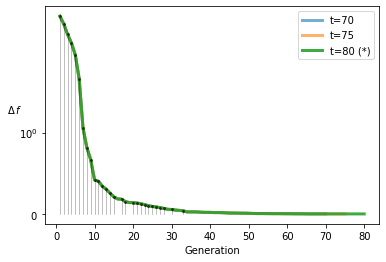

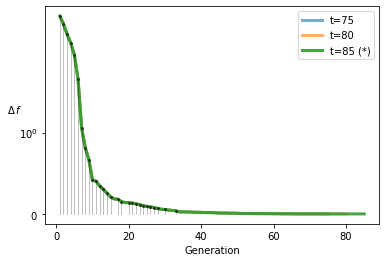

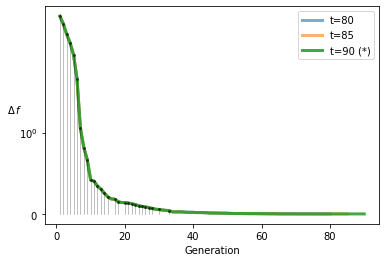

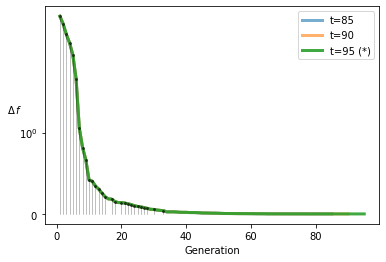

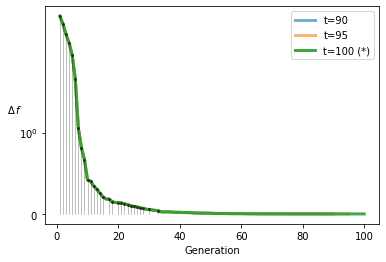

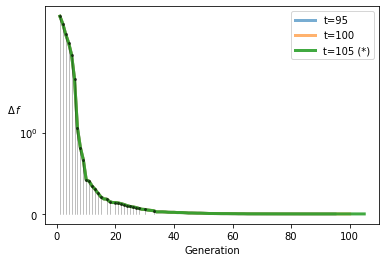

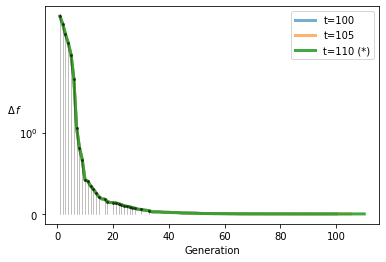

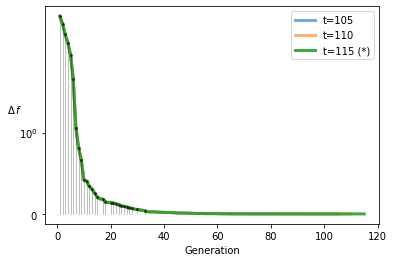

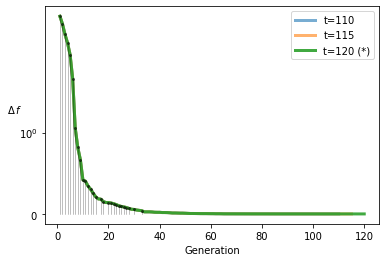

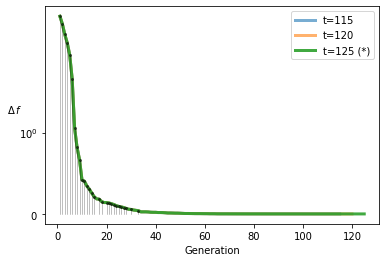

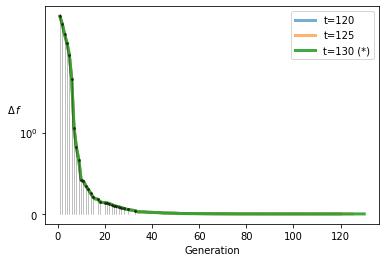

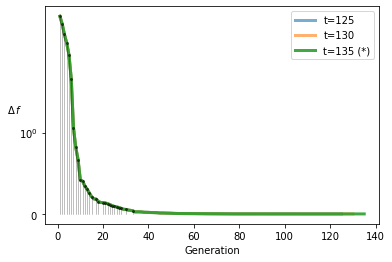

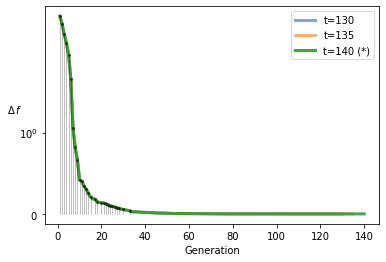

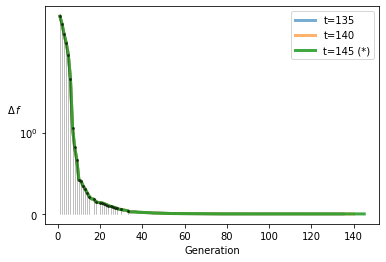

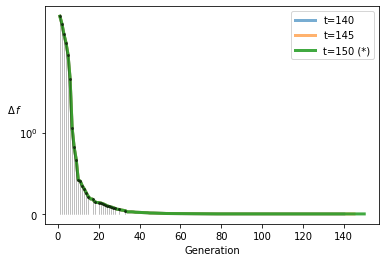

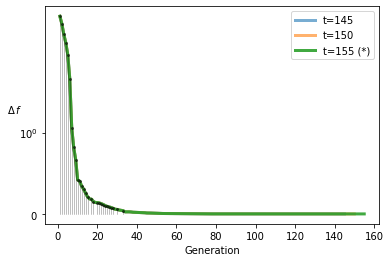

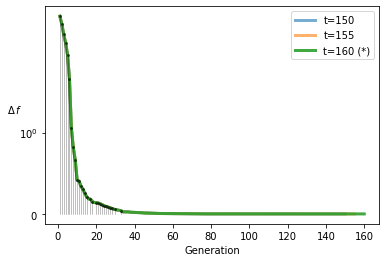

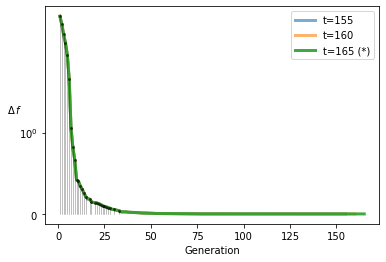

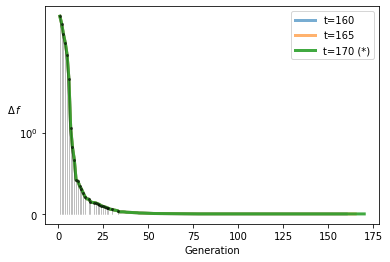

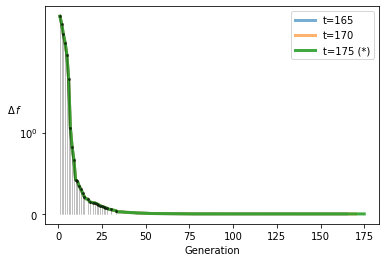

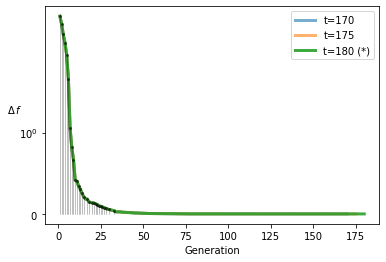

In [ ]:
from pymoo.util.running_metric import RunningMetricAnimation

running = RunningMetricAnimation(delta_gen=5,
                        n_plots=3,
                        key_press=False,
                        do_show=True)

for algorithm in res.history[:-1]:
    running.update(algorithm)

<Figure size 432x288 with 0 Axes>

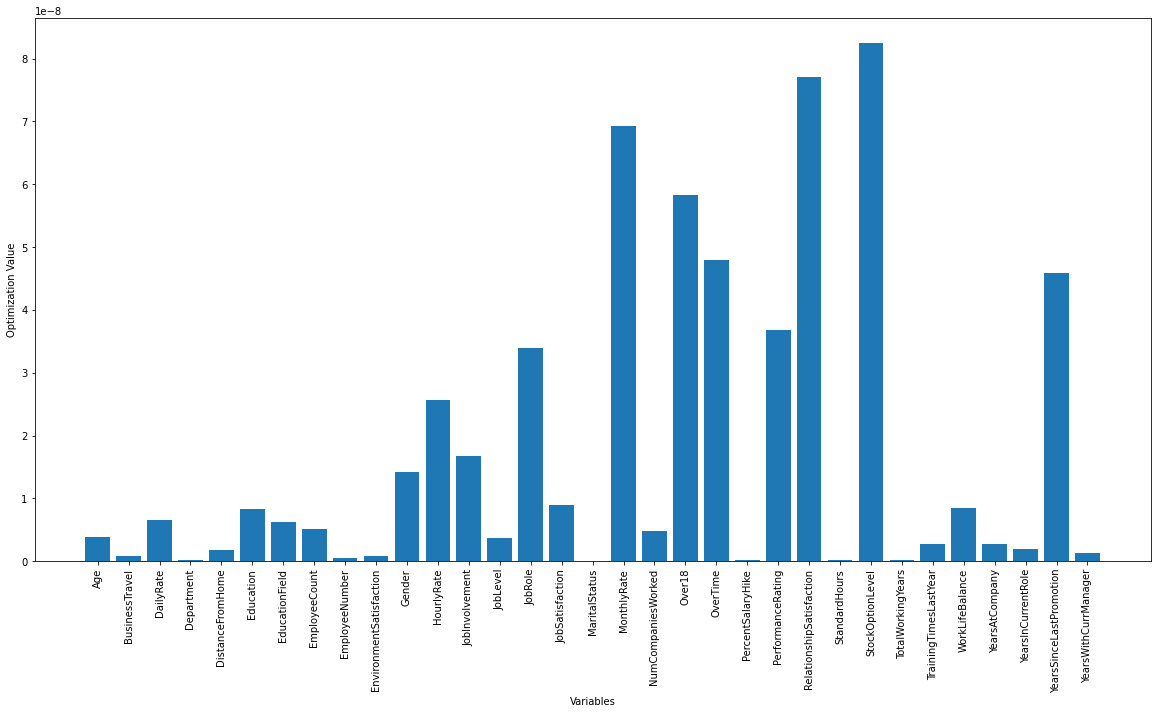

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.clf()

# using some dummy data for this example
xs = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
   'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus','MonthlyRate',
   'NumCompaniesWorked', 'Over18', 'OverTime','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
   'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
   'YearsWithCurrManager']
ys = [3.90766708e-09, 8.86586246e-10, 6.55278426e-09, 2.55751806e-10, 1.83035642e-09, 8.30315397e-09, 6.30610528e-09, 5.11238434e-09, 5.41640793e-10,
      7.86187407e-10, 1.42028420e-08, 2.56351878e-08, 1.68164510e-08, 3.70843417e-09, 3.38737359e-08, 8.92324147e-09, 6.99141365e-11, 6.92274230e-08,
      4.77063226e-09, 5.82116482e-08, 4.79913226e-08, 2.56216183e-10, 3.68446363e-08, 7.71354968e-08, 2.54514380e-10, 8.24023703e-08, 1.77761539e-10,
      2.74240470e-09, 8.39713122e-09, 2.80305720e-09, 1.91602223e-09, 4.59101330e-08, 1.31745027e-09]

plt.figure(figsize=(20, 10))
plt.bar(xs, ys)
plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Optimization Value")
# for x,y in zip(xs,ys):
#     label = "{:.2f}".format(y)
#     plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

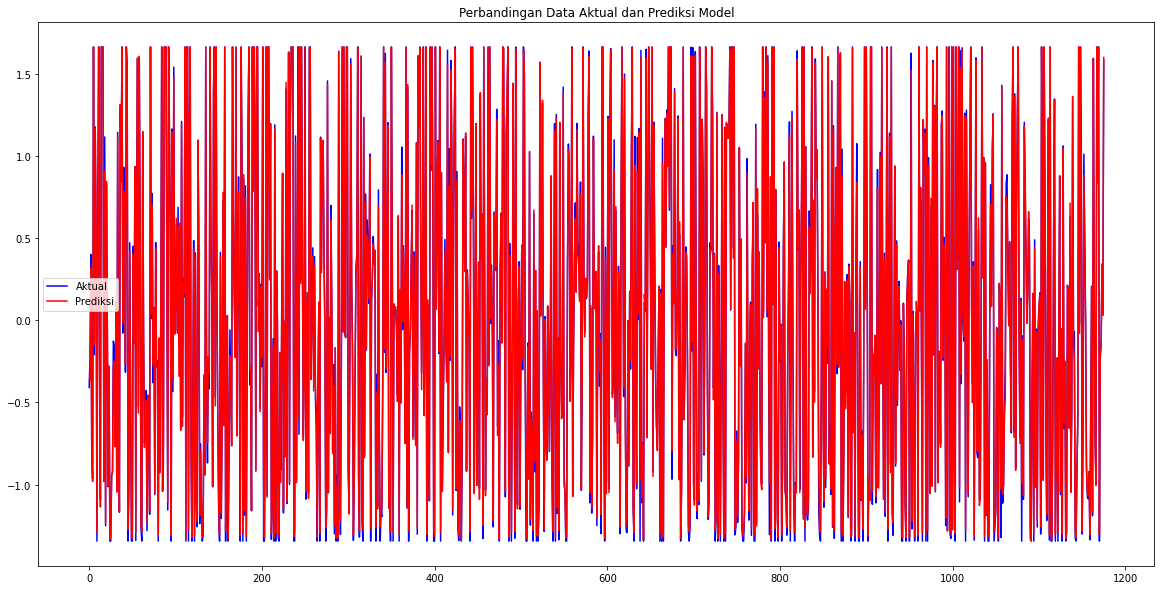

In [ ]:
# Line Chart perbandingan nilai aktual dan prediksi
# Data Training
y_pred_2 = reg.predict(X_train)
y_train = y_train.reset_index()
y_train = y_train.drop(columns=['index'], axis=1)

plt.figure(figsize=(20, 10))
plt.plot(y_train, color = 'blue', label = 'Aktual')
plt.plot(y_pred_2, color = 'red', label = 'Prediksi')
plt.title('Perbandingan Data Aktual dan Prediksi Model')
plt.legend()
plt.show()

In [ ]:
r2_score(y_train, y_pred_2)

0.9967257150838671

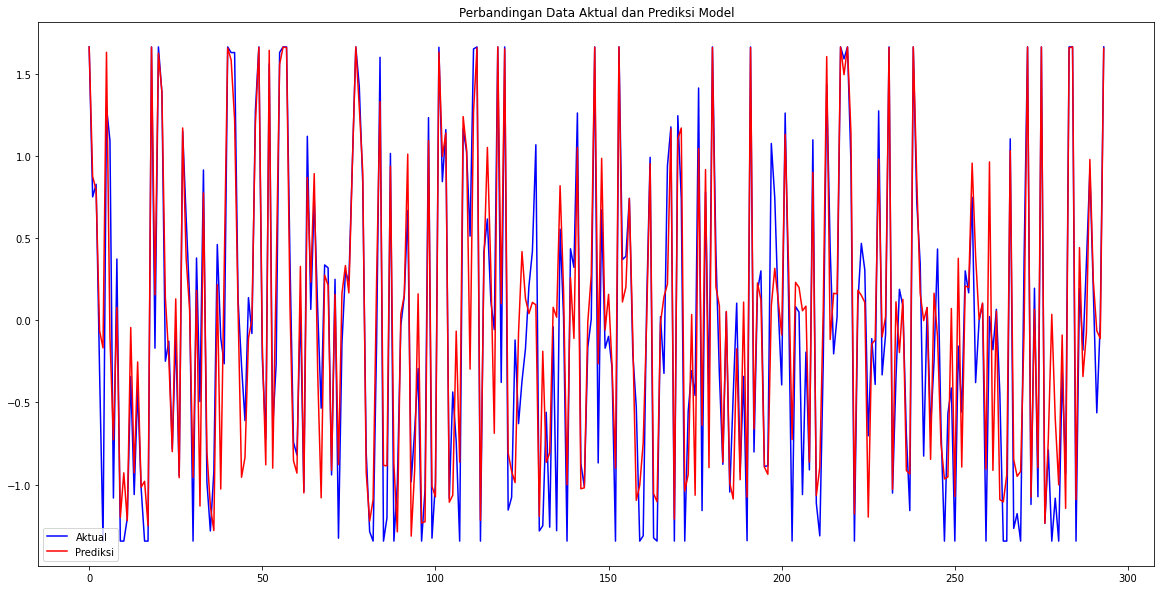

In [ ]:
# Data Testing
y_test = y_test.reset_index()
y_test = y_test.drop(columns=['index'], axis=1)

plt.figure(figsize=(20, 10))
plt.plot(y_test, color = 'blue', label = 'Aktual')
plt.plot(y_pred, color = 'red', label = 'Prediksi')
plt.title('Perbandingan Data Aktual dan Prediksi Model')
plt.legend()
plt.show()

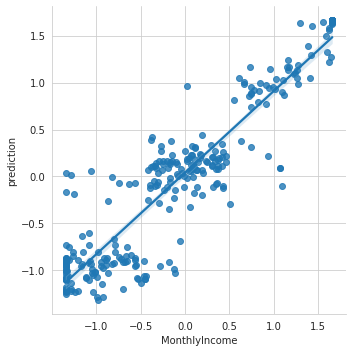

In [ ]:
# Grafik Linear antara nilai aktual dan prediksi
# Data Training
data = y_test
data['prediction'] = y_pred

sns.set_style('whitegrid')
sns.lmplot(x = 'MonthlyIncome', y = 'prediction', data=data)

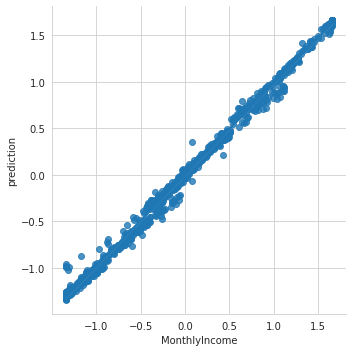

In [ ]:
# Data Training
data_2 = y_train
data_2['prediction'] = y_pred_2

sns.set_style('whitegrid')
sns.lmplot(x = 'MonthlyIncome', y = 'prediction', data=data_2)

In [ ]:
'https://medium.com/walmartglobaltech/genetic-algorithm-demystified-part-1-776e0f53703f'

'https://medium.com/walmartglobaltech/genetic-algorithm-demystified-part-1-776e0f53703f'

In [ ]:
X_train_web = X_train[['MonthlyRate', 'RelationshipSatisfaction', 'StockOptionLevel', 'YearsSinceLastPromotion']]
y_train_web = y_train['MonthlyIncome']

Model_web = ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=5,
                                n_estimators=100).fit(X_train_web, y_train_web)

In [ ]:
import pickle
pd.to_pickle(Model_web, "/content/drive/MyDrive/PROJECT-III/Bahan/model_web.pickle")

In [ ]:
X_train_web

,MonthlyRate,RelationshipSatisfaction,StockOptionLevel,YearsSinceLastPromotion
1097,0.213748,1.191438,-1.015958,-0.786796
727,-0.966093,0.266233,-1.015958,1.715743
254,-1.303110,-0.658973,0.364317,-0.786796
1175,-1.355532,0.266233,1.744592,-0.786796
1341,-0.310751,1.191438,0.364317,-0.369706
...,...,...,...,...
1130,-1.274861,-1.584178,-1.015958,-0.786796
1294,1.556476,1.191438,-1.015958,-0.786796
860,-0.258048,-0.658973,-1.015958,-0.369706
1459,-1.136429,-0.658973,0.364317,-0.786796


In [ ]:
y_train

,MonthlyIncome,prediction
0,-0.409338,-0.370895
1,-0.223776,-0.366605
2,0.399880,0.315711
3,-0.810158,-0.839011
4,-0.966208,-0.981916
...,...,...
1171,-0.232792,-0.210952
1172,-0.119888,-0.156090
1173,0.324713,0.342933
1174,0.037735,0.029268


In [ ]:
y_train.to_csv('/content/drive/MyDrive/PROJECT-III/Bahan/df_web.csv')

In [ ]:
X_pilihan = X_pso[['MonthlyRate', 'RelationshipSatisfaction', 'StockOptionLevel', 'YearsSinceLastPromotion']]
y_pilihan = y_pso

etr_model = ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=5,
                          n_estimators=100).fit(X_pilihan, y_pilihan)

In [ ]:
import pickle
pickle_out = open("/content/drive/MyDrive/PROJECT-III/Bahan/regressor.pkl", "wb")
pickle.dump(etr_model, pickle_out)
pickle_out.close()